<a href="https://colab.research.google.com/github/1911521010UlfatmiHanifa/Kelompok7-APM/blob/main/SVMLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv("drive/MyDrive/APM/csgoweapons2.csv")

In [4]:
dataset.head()

,Name,Team,Cost,Kill Award,Kills To Rebuy,Max Speed,RoF,Damage,DPS,Armor Penetration,...,Max Ammo,Reload (CR),Reload (FR),Recoil,Recoil (V),Recoil (H),Spread,Spread Run,Spread Stand,Spread Crouch
0,AK-47,T,$2700,$300,9.00,215,600,36,360,77.50%,...,90,1.20,2.5,30.0,0,70,0.6,175.06,6.41,4.81
1,AUG,CT,$3300,$300,11.00,220,667,28,311,90.00%,...,90,1.50,3.8,26.0,0,60,0.5,135.45,3.85,2.88
2,AWP,T,$4750,$100,47.50,200,41,115,79,97.50%,...,30,2.00,3.7,78.0,15,20,0.2,176.48,80.80,60.60
3,CZ75 Auto,T,$500,$300,1.67,240,600,33,300,77.65%,...,12,0.00,2.9,27.0,10,180,3.0,13.41,10.43,7.60
4,Desert Eagle,T,$700,$300,2.33,230,267,63,280,93.20%,...,35,0.88,2.3,48.2,18,60,2.0,48.10,4.20,2.18


In [5]:
dataset.shape

(32, 23)

In [7]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataset['Team'] = labelencoder.fit_transform(dataset['Team'])
dataset.head()

,Name,Team,Cost,Kill Award,Kills To Rebuy,Max Speed,RoF,Damage,DPS,Armor Penetration,...,Max Ammo,Reload (CR),Reload (FR),Recoil,Recoil (V),Recoil (H),Spread,Spread Run,Spread Stand,Spread Crouch
0,AK-47,1,$2700,$300,9.00,215,600,36,360,77.50%,...,90,1.20,2.5,30.0,0,70,0.6,175.06,6.41,4.81
1,AUG,0,$3300,$300,11.00,220,667,28,311,90.00%,...,90,1.50,3.8,26.0,0,60,0.5,135.45,3.85,2.88
2,AWP,1,$4750,$100,47.50,200,41,115,79,97.50%,...,30,2.00,3.7,78.0,15,20,0.2,176.48,80.80,60.60
3,CZ75 Auto,1,$500,$300,1.67,240,600,33,300,77.65%,...,12,0.00,2.9,27.0,10,180,3.0,13.41,10.43,7.60
4,Desert Eagle,1,$700,$300,2.33,230,267,63,280,93.20%,...,35,0.88,2.3,48.2,18,60,2.0,48.10,4.20,2.18


In [14]:
#Deklarasi Variabel Dependent dan Independent
X = dataset[['Kills To Rebuy', 'Max Speed', 'RoF', 'Damage', 'DPS', 
            'Max Range', 'Clip Size', 'Max Ammo', 'Reload (CR)', 'Reload (FR)', 'Recoil', 
              'Spread', 'Spread Run', 'Spread Stand','Spread Crouch' ]]
y = dataset['Team']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
#menggunakan SVM library untuk membuat SVM classifier
classifier = svm.SVC(kernel = 'linear')
 
#memasukkan training data kedalam classifier
classifier.fit(X_train, y_train)
 
#memasukkan testing data ke variabel y_predict
y_predict = classifier.predict(X_test)
 
#menampilkan classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.67      1.00      0.80         4

    accuracy                           0.71         7
   macro avg       0.83      0.67      0.65         7
weighted avg       0.81      0.71      0.67         7



Text(69.0, 0.5, 'Actual')

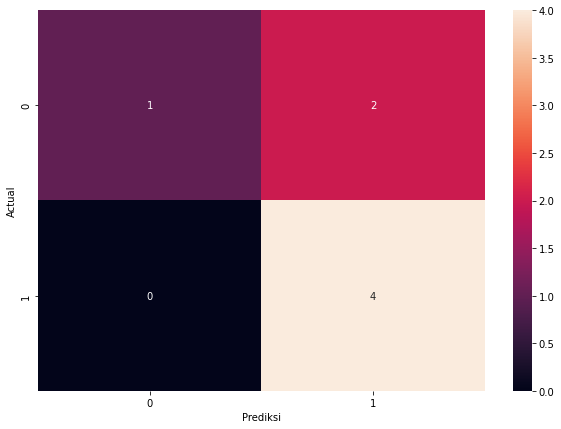

In [18]:
#mengimplementasikan testing data dan hasil prediksi dalam confusion matrix
cm_svm = confusion_matrix(y_test, y_predict)
#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sn.heatmap(cm_svm, annot=True)
plt.xlabel('Prediksi')
plt.ylabel('Actual')